Image Analysis with Python Part II
Created and Presented by Bryce Asay
Date: 11/14/2018

We are going to import opencv and make sure that we are using the correct version. This is followed by importing matplotlib for displaying the image in jupyter notebook and numpy for numerical calculations. 

In [1]:
import cv2 
print(cv2.__version__)

3.4.3


In [2]:
import matplotlib.pyplot as plt
import numpy as np

Next we are going to upload our image. Does it look like the original image we uploaded?

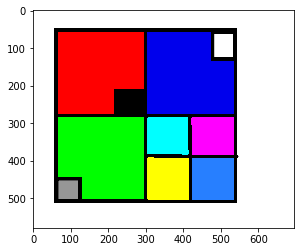

In [4]:
color = cv2.imread("color_experiment.png")
plt.imshow(color)
plt.show()

OpenCV uploads images in the BGR format. Make sure to always check your color formats before doing any type of analysis. Below we will convert the BGR image over to RGB. 

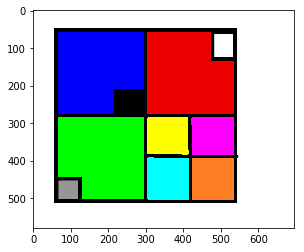

In [5]:
color = cv2.cvtColor(color, cv2.COLOR_BGR2RGB)
plt.imshow(color)
plt.show()

Next we will create a small program to determine the RGB, HSV, and X/Y cooridinates at a specific location on an image. I highly reccomend following Bucky Roberts (aka TheNewBoston) tutorial on GUI creation https://github.com/buckyroberts or https://www.youtube.com/watch?v=RJB1Ek2Ko_Y. 

In [27]:
#Import our packages
from tkinter import *
import PIL.Image, PIL.ImageTk

#Upload the image that will be visible and an accessible format for tkinter 
color_pillow = PIL.Image.open("color_experiment.png")
#Create an RGB and HSV reference images for our function 
color = cv2.cvtColor(cv2.imread("color_experiment.png"),cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(color, cv2.COLOR_RGB2HSV)
#Create the workspace where the image will go
root = Tk()
#upload the 
photo = PIL.ImageTk.PhotoImage(image = PIL.Image.fromarray(color))
#Insert the image as a label into the root 
label = Label(root, image = photo)
#since we have only one object we can randomly pack it in
label.pack()

#the function that will access our values
def get_values(event):
    x,y = event.x, event.y
    r, g, b = color_pillow.getpixel((x, y))
    print('RGB : '+'{},{},{}'.format(r,g,b))
    print("HSV : ",hsv[y, x])
    print("X:",x,"Y:",y)
#bind the function to a specific event, in this case we will bind it to the left mouse click
root.bind("<Button 1>",get_values)

#necessary to keep the GUI open
root.mainloop()


RGB : 236,0,0
HSV :  [  0 255 236]
X: 434 Y: 180


The first segmentation that we will be doing is color segmentation, in case you didnt run the tkinter program lets reupload the image as an HSV.

In [9]:
hsv_color = cv2.cvtColor(color, cv2.COLOR_RGB2HSV)

We can also calculate the HSV value from RGB meaning in our tkinter program we only have to have one refference image for our calculations (uses less memory). If you used the above tkinter program you should have seen that red RGB value is [236,0,0], lets convert that to HSV. You can also use color references with specific values to avoid having to determine from the image itself. 

In [11]:
red = np.uint8([[[236,0,0 ]]])
hsv_red = cv2.cvtColor(red,cv2.COLOR_BGR2HSV) 
print(hsv_red) 

[[[ 30 255 255]]]


To segment the image we first need to use the far left value for the Hue (color). Normally when I find the value I will do 10 below for the min and 10 above for the max. I set the Saturation and Values min generally to 50 and the max to 255. OpenCV calculates HSV differently than other programs so be careful when using reference values from outside sources. 

In [12]:
red_min = (0,50,50)
red_max = (0,255,255)

Next we will use the in range function to only find values that lie within the given values. 

In [14]:
mask = cv2.inRange(hsv_color, red_min, red_max)

Next we will perform a bitwise algorthm to create a mask of the desired color and display the results. We should have only the red pixels left from the image. 

In [15]:
result = cv2.bitwise_and(color, color, mask=mask)

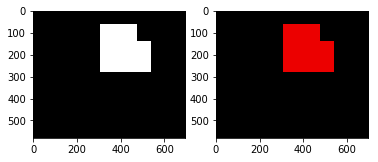

In [16]:
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

Next we are going to threshold and use the findContours function to count the number of objects and get their respective sizes. 

In [30]:
gray_image = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

## threshold
th, threshed = cv2.threshold(gray_image, 100, 255,cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)

## findcontours
_,cnts,_ = cv2.findContours(threshed, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)


## filter by area (size of each object)
s1= 100000   #smallest size
s2 = 500000  #largest size
xcnts = []
for cnt in cnts:
    if s1<cv2.contourArea(cnt) <s2:
        xcnts.append(cnt)
        print("Size: ",cv2.contourArea(cnt))
print("Dots number: {}".format(len(xcnts)))

Size:  402405.0
Dots number: 1


In [19]:
drawn_img = cv2.drawContours(gray_image, cnts, -1, (0,255,0),3)

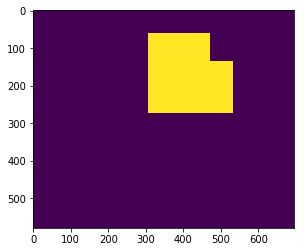

In [22]:
plt.imshow(drawn_img)
plt.show()

Next, using the above code try to count the number of green bacteria from the provided image. You should have all the tools necessary to accomplish this. 